___
# Decision Trees in Python
___

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target'] = y

In [4]:
species_names = iris.target_names
print(species_names)

['setosa' 'versicolor' 'virginica']


<img src="setosa.jpg" width="300" height="300"/> <img src="versicolor.jpg" width="300" height="300"/> <img src="virginica.jpg" width="300" height="300"/>


In [22]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## EDA
We'll just check out a simple pairplot for this small dataset.

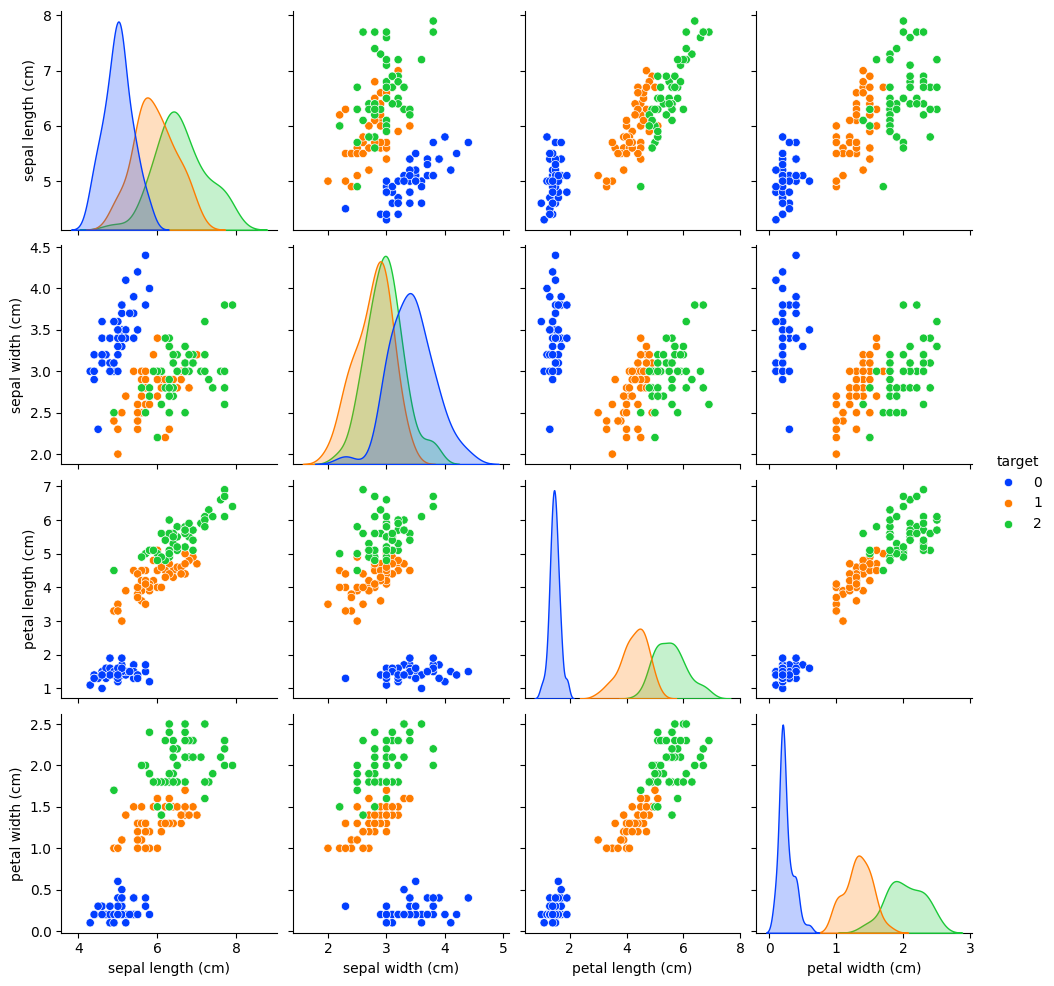

In [8]:
sns.pairplot(df,hue='target', palette='bright')

## Train Test Split

Let's split up the data into a training set and a test set!

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('target',axis=1)
y = df['target']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Decision Trees

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtree = DecisionTreeClassifier()

In [14]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [15]:
predictions = dtree.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, r2_score

In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [18]:
print(confusion_matrix(y_test,predictions))

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]


In [19]:
r_squared = r2_score(y_test, predictions)
print("R-squared score:", r_squared)

R-squared score: 0.9199288256227758


## Tree Visualization

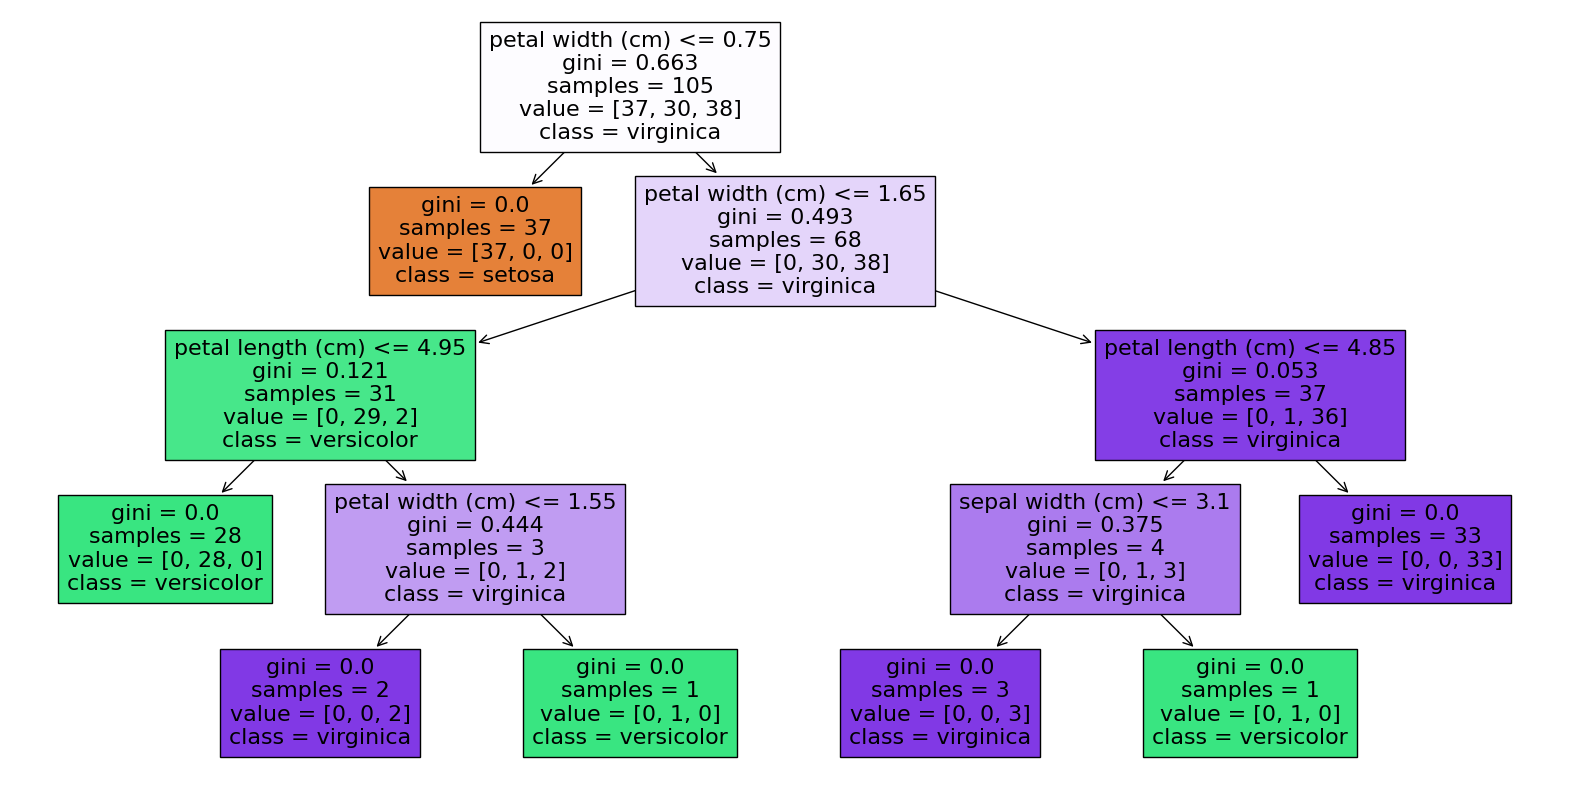

In [20]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()